In [1]:
from loaders.patient_loader import Patient_Loader
from loaders.vehicle_loader import Vehicle_Loader

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [3]:
patient_loader = Patient_Loader()
patients = patient_loader('./data/data_patients.json')
positions = { patient._id:[patient.to_json()['loc']['x'], patient.to_json()['loc']['y']] for patient in patients}

0


In [4]:
G = nx.Graph()
nodes: list = []
for patient in patients:
    attributes = patient.to_json()
    if patient._id == 0:
        attributes['color'] = 'lightblue'
    else:
        attributes['color'] = 'lightgreen'
    nodes.append(
        (patient._id, attributes)
    )
G.add_nodes_from(nodes)
edges: list = []
for patient1 in patients:
    for patient2 in patients:
        if patient1._id !=  patient2._id:
            edges.append((patient1._id, patient2._id))

G.add_edges_from(edges)
colors = [node[1]['color'] for node in G.nodes(data=True)] 

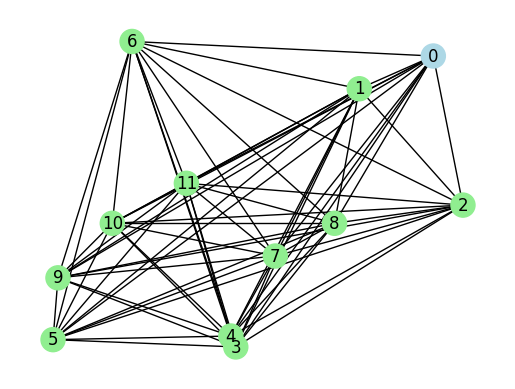

In [5]:
ax = plt.figure().gca()
ax.set_axis_off()

options = {"node_size": 300, "node_color": colors}
nx.draw_networkx(G, positions, with_labels=True, **options)

In [6]:
vehicle_loader = Vehicle_Loader()
vehicles = vehicle_loader('./data/data_vehicles.json', patients[0])
vehicles_dict = [vehicle.to_json() for vehicle in vehicles]

[{'id': 0, 'MAX_Q': 80, 'MIN_Q': 0, 'VD': 40, 'FLETE': 15, 'CC': 0.35, 'EM': 2.7}, {'id': 1, 'MAX_Q': 80, 'MIN_Q': 0, 'VD': 40, 'FLETE': 15, 'CC': 0.35, 'EM': 2.7}, {'id': 2, 'MAX_Q': 80, 'MIN_Q': 0, 'VD': 40, 'FLETE': 15, 'CC': 0.35, 'EM': 2.7}]


In [7]:
pd.DataFrame(vehicles_dict)

,id,MAX_Q,MIN_Q,q,location,WARE_HOUSE,VD,FLETE,t,CC,EM,is_assigned,total_distance,service_route
0,0,80.0,0.0,80.0,"{'x': 90.0, 'y': 85.0}","{'_id': 0, 'loc': {'x': 90.0, 'y': 85.0}, 'tw'...",40.0,15.0,4.0,0.35,2.7,False,0,"[{'is_warehouse': True, 'patient': (<models.pa..."
1,1,80.0,0.0,80.0,"{'x': 90.0, 'y': 85.0}","{'_id': 0, 'loc': {'x': 90.0, 'y': 85.0}, 'tw'...",40.0,15.0,4.0,0.35,2.7,False,0,"[{'is_warehouse': True, 'patient': (<models.pa..."
2,2,80.0,0.0,80.0,"{'x': 90.0, 'y': 85.0}","{'_id': 0, 'loc': {'x': 90.0, 'y': 85.0}, 'tw'...",40.0,15.0,4.0,0.35,2.7,False,0,"[{'is_warehouse': True, 'patient': (<models.pa..."
